Let begin the project with self listed goals:
- Show the relationship between life expectancy and gdp in each country.
- Compare the average gdp in each country.
- Compare the average life expectancy in each country.


To address the first goals. Here is what I need to do:
- Group the data by country.
- Create subplot.
- Visualize scatterplot for each country.

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


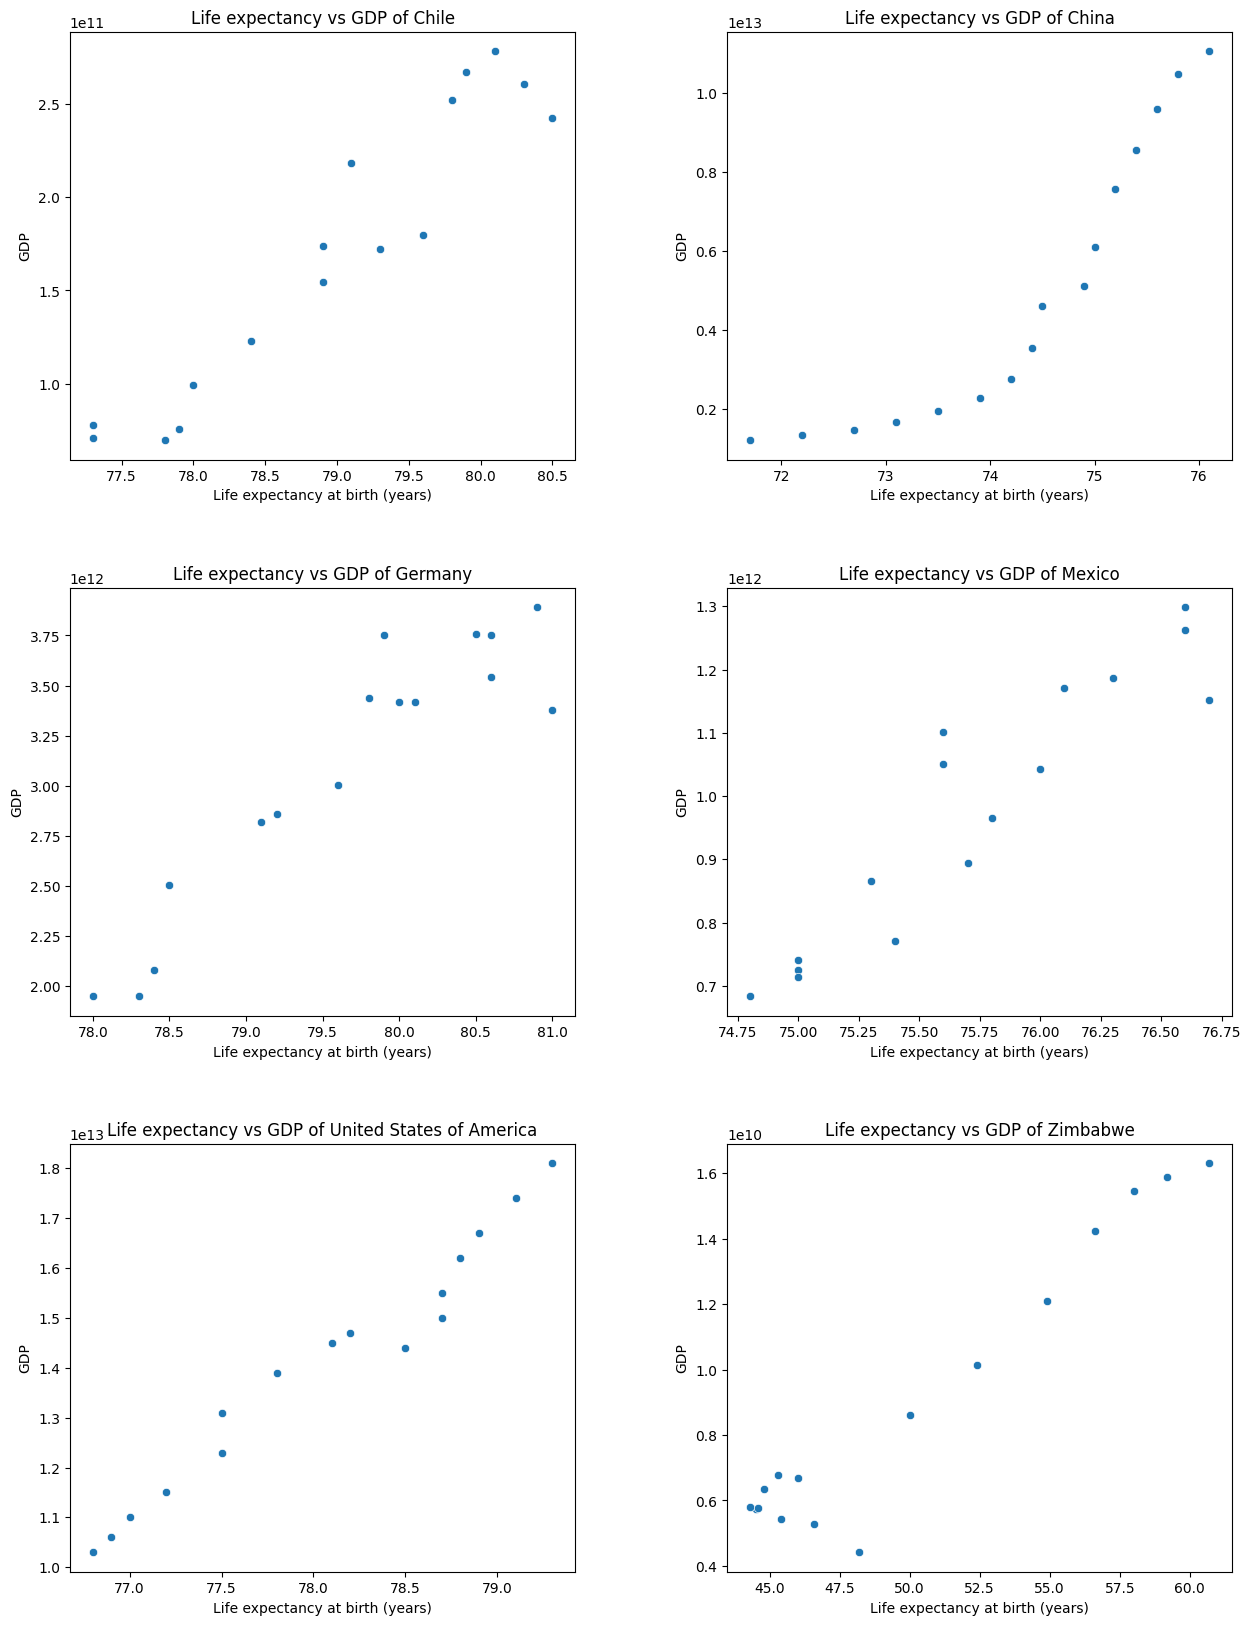

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# load the data from csv file

legdp = pd.read_csv('all_data.csv')

# view the first 5 row of the data frame
print(legdp.head())

# get all the countries
countries = legdp.Country.unique()

# create a dictionary with the key is 'Country' and the value is the dataframe
legdp_by_countries = {}
for country in countries:
    legdp_by_countries[country] = legdp[legdp['Country'] == country].reset_index(drop = True)

# create a function to create scatter plot for life expectancy and GDP
def create_subplot(country, source, n, index):
    df = source[country]
    ax = plt.subplot(3, n, index + 1)
    sns.scatterplot(x = 'Life expectancy at birth (years)', y = 'GDP', data = df)
    plt.title(f'Life expectancy vs GDP of {country}')
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    return ax

# create a figure
plt.figure(figsize=(15,20))
for i in range(len(countries)):
    create_subplot(countries[i],legdp_by_countries,2,i)
plt.savefig('life_expectancy_gdp.png')

from the scatter plot we could see that in 6 countries above, they all indicate that higher life expectancy at birth accosiated with high GDP

moving on to the next goal is comparision of average GDP of each countries. To do this I would use time-series line chart to see the progress of each counties's GDP.

0                       China
1                     Germany
2    United States of America
Name: Country, dtype: object


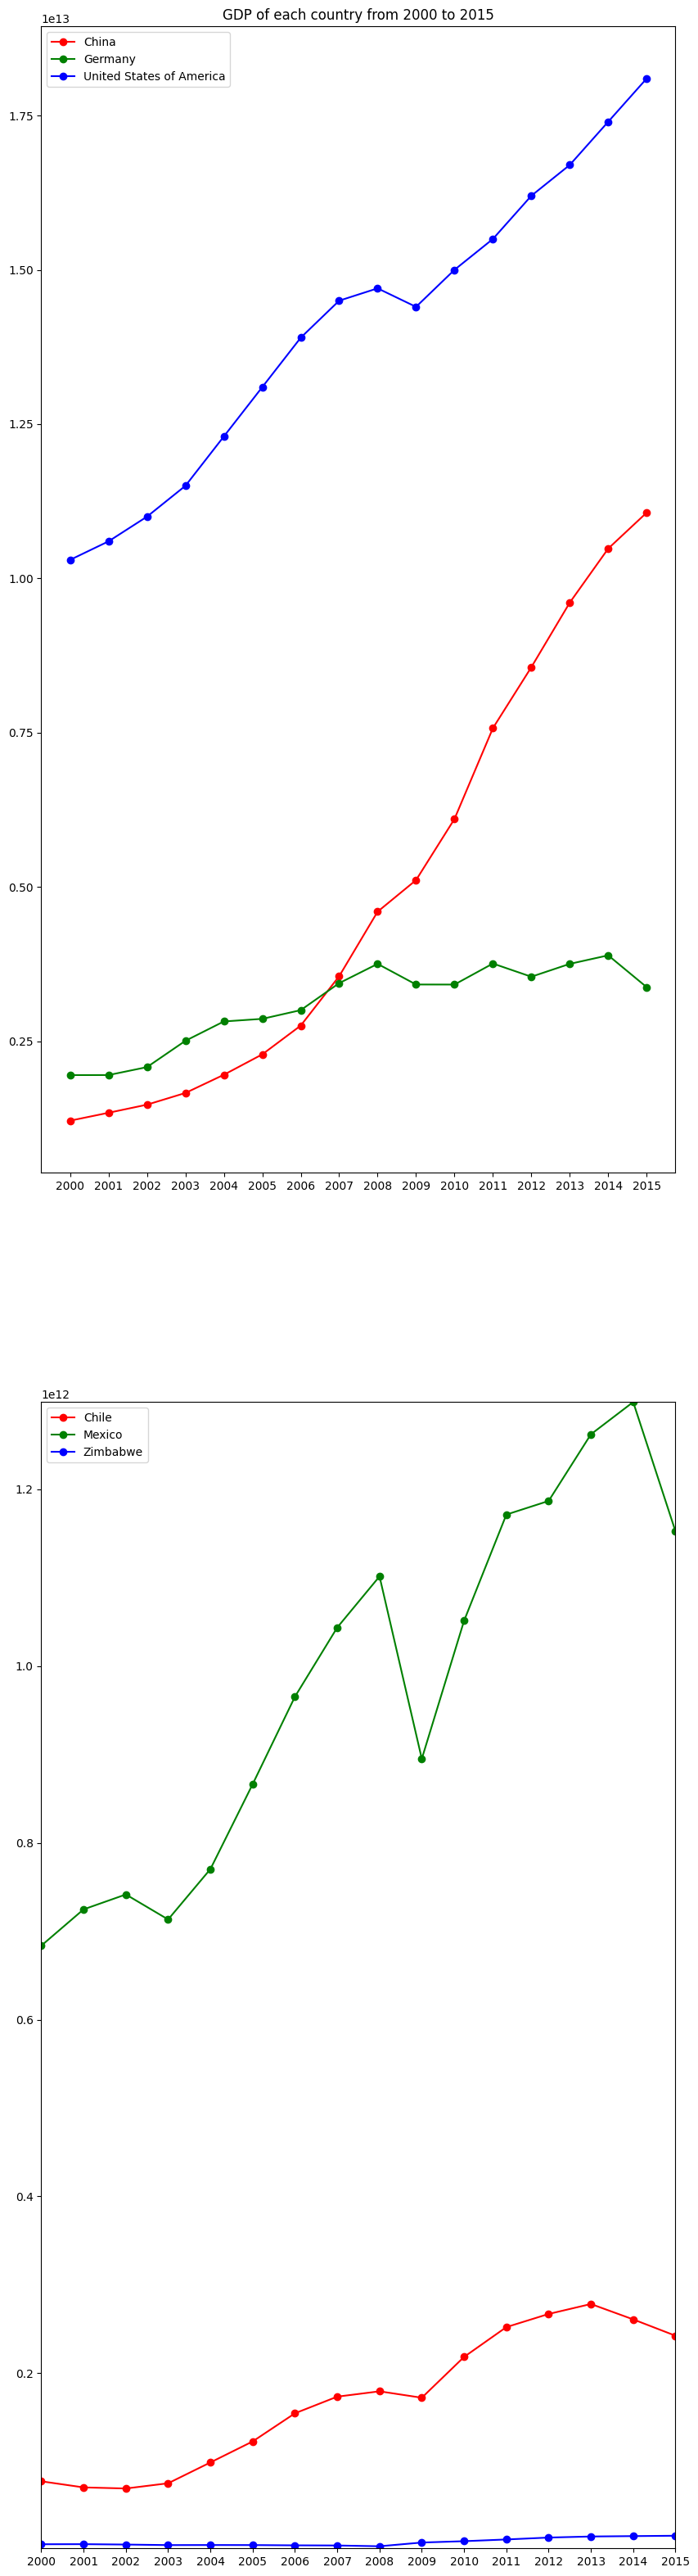

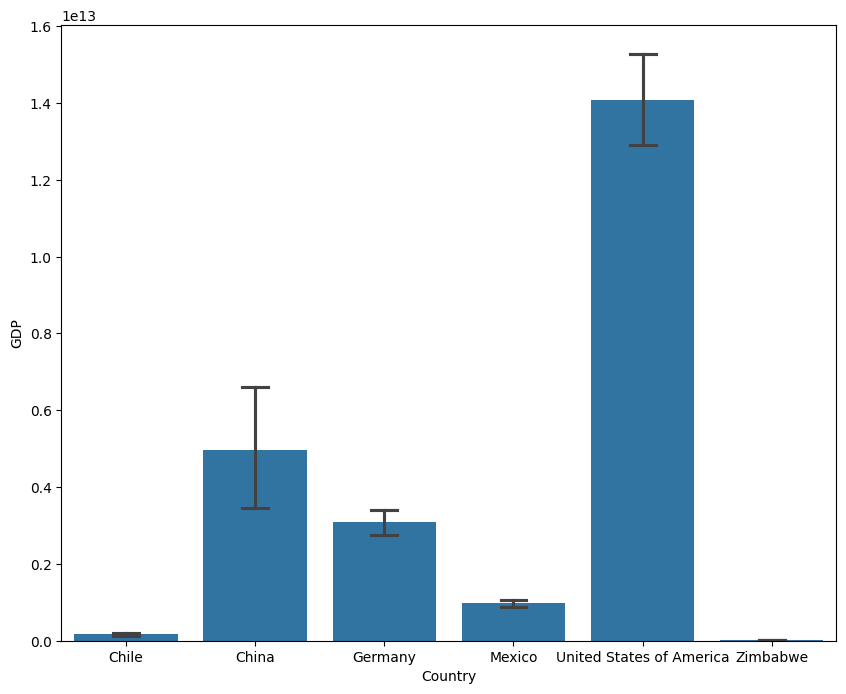

In [84]:
# create years list
years = legdp_by_countries[countries[0]]['Year']
colors = ['red','green','blue','black','orange','purple']

# divide countries into 2 groups
df = legdp.groupby('Country')['GDP'].mean().reset_index()
lower_gdp = df['Country'][df['GDP'] < 10**12].reset_index(drop = True)
higher_gdp = df['Country'][df['GDP'] >= 10**12].reset_index(drop = True)
print(higher_gdp)

# plot the line chart for higher group
plt.figure(figsize=(10,40))
ax = plt.subplot(2,1,1)
for i in range(len(higher_gdp)):
    plt.plot(range(len(years)), legdp_by_countries[higher_gdp[i]]['GDP'], color = colors[i] , marker = 'o')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.legend(higher_gdp)
plt.title('GDP of each country from 2000 to 2015')

# plot the line chart for lower group
ax2 = plt.subplot(2,1,2)
for i in range(len(lower_gdp)):
    plt.plot(range(len(years)), legdp_by_countries[lower_gdp[i]]['GDP'], color = colors[i] , marker = 'o')
ax2.axis([0,15,2*10**9,legdp_by_countries['Mexico']['GDP'].max()])
ax2.set_xticks(range(len(years)))
ax2.set_xticklabels(years)
ax2.legend(lower_gdp)
plt.savefig('gdp_years.png')

plt.figure(figsize=(10,8))
sns.barplot(data = legdp, x = 'Country', y = 'GDP', capsize= 0.2)
plt.savefig('gdp_comparision_barchart.png')

to compare the average life expectancy in each countries. I would use the line chart.

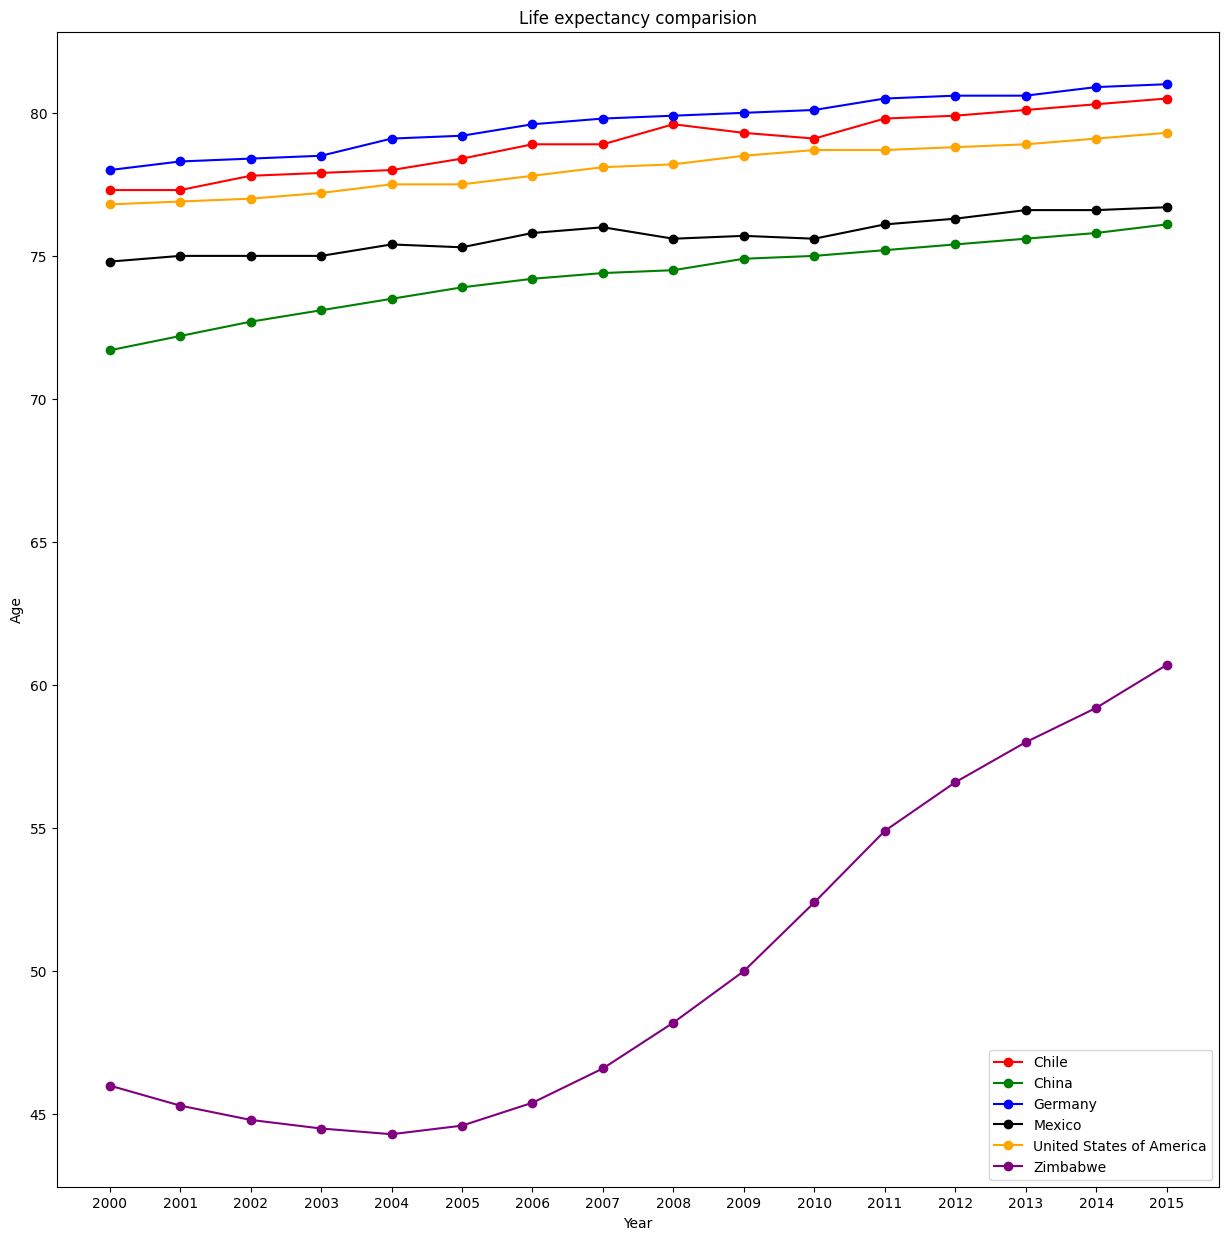

In [90]:
plt.figure(figsize=(15,15))
ax3 = plt.subplot()
for i in range(len(countries)):
    plt.plot(range(len(years)), legdp_by_countries[countries[i]]['Life expectancy at birth (years)'], color = colors[i], marker = 'o')
ax3.set_xticks(range(len(years)))
ax3.set_xticklabels(years)
plt.title('Life expectancy comparision')
plt.xlabel('Year')
plt.ylabel('Age')
ax3.legend(countries)
plt.savefig('life_expectancy_comparision.png')